In [64]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn import linear_model

In [35]:
df = pd.read_csv('C:\\Users\\Guest_User\\Downloads\\HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [36]:
left = df[df.left==1]
left.shape

retained = df[df.left==0]
retained.shape

(11428, 10)

In [38]:
left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [39]:
mean_values = df.groupby('left').mean(numeric_only=True)
mean_values

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Satisfaction appears to be low for employees who left. They also appear to spend 8 hours more a month and have received only 25% of the promotions acheived by the people remaining in the company

Text(0.5, 1.0, 'Impact of salary on retention')

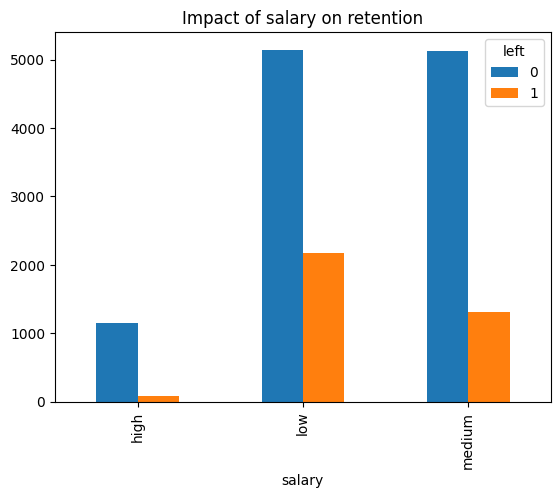

In [41]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.title("Impact of salary on retention")

In [14]:
#High Salaries lead to less employees leaving

Text(0.5, 1.0, 'Department vs retained employees')

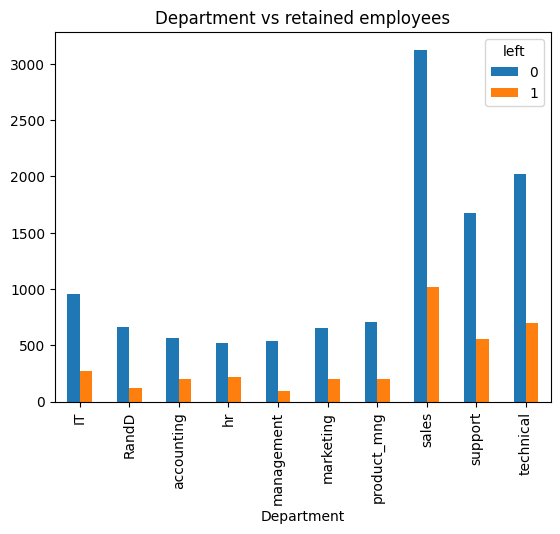

In [42]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title("Department vs retained employees")

In [16]:
#Equal proportion of all employees are leaving the company (no correlation between department and retained employees)
#Therefore, satisfaction, amount of time spent at the company, promotions and salary are impacting the leave rate the most

In [43]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [44]:
dummies = pd.get_dummies(subdf.salary)
dummies

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [45]:
subdf = pd.concat([subdf, dummies], axis = 1)

In [46]:
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [47]:
subdf = subdf.drop(['salary', 'medium'], axis = 'columns')
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,False,True
1,0.80,262,0,False,False
2,0.11,272,0,False,False
3,0.72,223,0,False,True
4,0.37,159,0,False,True
...,...,...,...,...,...
14994,0.40,151,0,False,True
14995,0.37,160,0,False,True
14996,0.37,143,0,False,True
14997,0.11,280,0,False,True


In [48]:
x = subdf

In [49]:
y = df.left

In [50]:
y


0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3)

In [53]:
log = linear_model.LogisticRegression()

In [54]:
log.fit(x_train,y_train)

LogisticRegression()

In [55]:
log.score(x_train,y_train)

0.7721715936874861

In [56]:
log.score(x_test,y_test)

0.7835238095238095

In [58]:
z = log.predict(x_test)


In [59]:
z


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
num = np.count_nonzero(z == 1)
num

1083